# Reindexing: align axes

Reindexing is the action of shrinking or extending an array to match a new index, in some ways similar to interpolation, except that by default, the new index has to be present, or it is filled with NaN. Actual interpolation is performed by passing `method="nearest"` or `method="interp"` parameter.

### reindex_axis

In [1]:
from dimarray import DimArray
a = DimArray([3,4],[('x0',[1,3])])
a.reindex_axis([1,2,3])

dimarray: 2 non-null elements (1 null)
0 / x0 (3): 1 to 3
array([  3.,  nan,   4.])

Also works with string indices

In [2]:
b = DimArray([1,2,3],[('x0', ['a','b','c'])])
b.reindex_axis(['b','d'])

dimarray: 1 non-null elements (1 null)
0 / x0 (2): 'b' to 'd'
array([  2.,  nan])

It is possible to fill the missing values with the preceding, or following values of the sorted array (see numpy.searchsorted for more ample documentation):

See :meth:`dimarray.DimArray.reindex_axis`

In [3]:
b.reindex_axis(['b','d'], method='left')

dimarray: 2 non-null elements (0 null)
0 / x0 (2): 'b' to 'd'
array([2, 3])

In [4]:
b.reindex_axis(['b','d'], method='right')

dimarray: 2 non-null elements (0 null)
0 / x0 (2): 'b' to 'd'
array([3, 3])

### reindex_like

Same as reindex_axis, except that the new axes are searched for in another array.

In [5]:
c = DimArray([[1,2,3], [4,5,6]],[('x0',["a","b"]),('x1',[1, 2, 3])])
c.reindex_like(b)

dimarray: 6 non-null elements (3 null)
0 / x0 (3): 'a' to 'c'
1 / x1 (3): 1 to 3
array([[  1.,   2.,   3.],
       [  4.,   5.,   6.],
       [ nan,  nan,  nan]])

See :meth:`dimarray.DimArray.reindex_like`

### Interpolation

Sometimes you do not want one-to-one re-indexing but interpolation. Use the `DimArray.interp_axis` method for linear, piecewise interpolation (wrapper around np.interp)

In [6]:
a.interp_axis([0,1,2,3])

dimarray: 3 non-null elements (1 null)
0 / x0 (4): 0 to 3
array([ nan,  3. ,  3.5,  4. ])

In [7]:
import numpy as np
time=np.linspace(1950,1955,8)
v = DimArray(np.cos(time), axes=('time',time))
#w = v.reindex_axis(np.linspace(1948,1957,10), axis='time', method='interp')
xl = v.reindex_axis(np.linspace(1948,1957,10), axis='time', method='left')
xr = v.reindex_axis(np.linspace(1948,1957,10), axis='time', method='right')
w = v.interp_axis(np.linspace(1948,1957,10), axis='time')

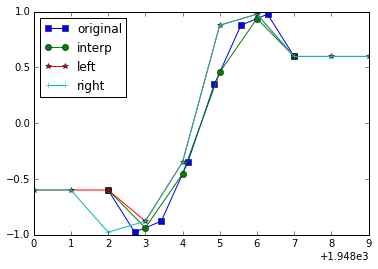

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.clf()  # doctest: +SKIP
plt.plot(v.time, v.values, 's-', label='original')  # doctest: +SKIP
plt.plot(w.time, w.values, 'o-', label='interp')  # doctest: +SKIP
#plt.plot(w1.time, w.values, 'o--', color='k', label='interp')
plt.plot(xl.time, xl.values, '*-',label='left') # doctest: +SKIP
plt.plot(xr.time, xr.values, '+-',label='right') # doctest: +SKIP
plt.legend(loc='upper left')  

### align

It is also possible to proceed to axis alignment on a sequence of arrays

In [9]:
# align axes
from dimarray import align
x = DimArray([1,2,3],('x0',[1,2,3]))
y = DimArray([3,4],('x0',[2,4]))
xa, ya = align((x, y))
ya

dimarray: 2 non-null elements (2 null)
0 / x0 (4): 1 to 4
array([ nan,   3.,  nan,   4.])

See :func:`dimarray.align`